<b><font size="5">HR Attirition Prediction</b>

<b>Employee attrition is one of the major concerns for an HR organization because it will cause losses of expertise, losses of productivity, customer goodwill, hiring costs, training costs, and so on. Employee leaves due to various reasons such as compensation, work satisfaction, performance, supervisors, and so on.</b>
    
<b>First of all, HR needs to collect comprehensive data about an employee such as education, salary, experience… We also need data from supervisors such as performance, relationships, promotions…</b>
    
<b>After that, HR can use this information to predict employees’ tendency to leave or not leave .</b>

<b><font size="3">Importing Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
employee_prediction = pd.read_csv('HR_Employee_Attrition-1.csv')

In [3]:
employee_prediction.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


<b><font size="3">Exploratory Data Analysis</b>

In [4]:
employee_prediction.shape

(2940, 35)

In [5]:
employee_prediction.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
employee_prediction.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
employee_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [8]:
employee_prediction.isnull().values.any()

False

In [9]:
employee_prediction['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [10]:
print(employee_prediction.columns)

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [11]:
attrition_count = pd.DataFrame(employee_prediction['Attrition'].value_counts())

([<matplotlib.patches.Wedge at 0x1fded5228b0>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')])

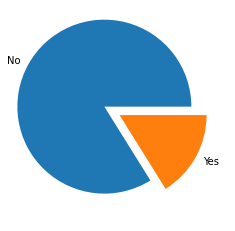

In [12]:
plt.pie(attrition_count['Attrition'] , labels = ['No' , 'Yes'] , explode = (0.2,0))

In [14]:
print(employee_prediction.columns)

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


<AxesSubplot:xlabel='Attrition', ylabel='count'>

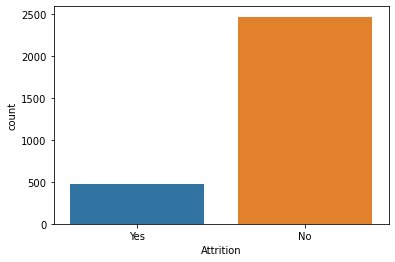

In [15]:
sns.countplot(employee_prediction['Attrition'])

In [16]:
#Check for duplicates
employee_prediction.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2935    False
2936    False
2937    False
2938    False
2939    False
Length: 2940, dtype: bool

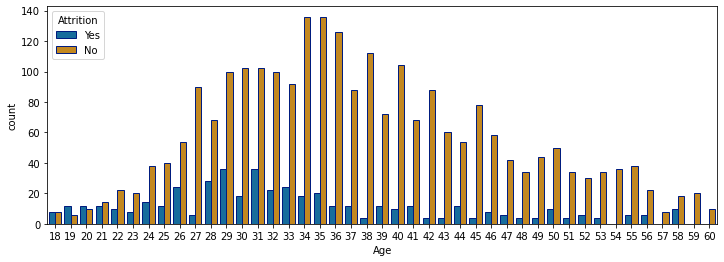

In [17]:
#Show the number of employees that left and stayed by age
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
#ax = axis
sns.countplot(x='Age', hue='Attrition', data = employee_prediction, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [18]:
#Print all of the object data types and their unique values
for column in employee_prediction.columns:
    if employee_prediction[column].dtype == object:
        print(str(column) + ' : ' + str(employee_prediction[column].unique()))
        print(employee_prediction[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
________________________________________________________________

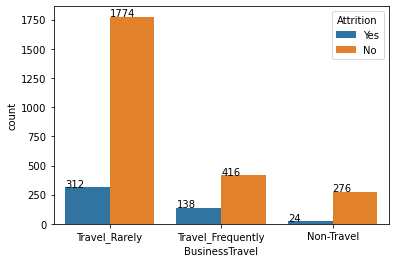

In [19]:
#Show the number of employees that left and stayed  based on BusinessTravel
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=employee_prediction)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

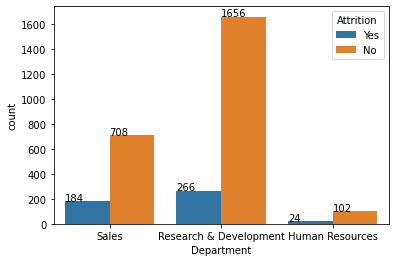

In [20]:
#Show the number of employees that left and stayed by Department
ax = sns.countplot(x="Department", hue="Attrition", data=employee_prediction)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

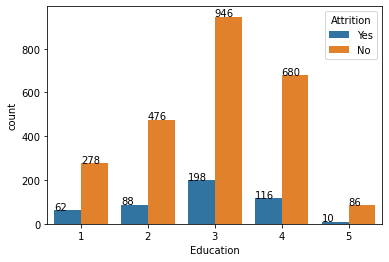

In [21]:
#Show the number of employees that left and stayed by Education
ax = sns.countplot(x="Education", hue="Attrition", data=employee_prediction)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

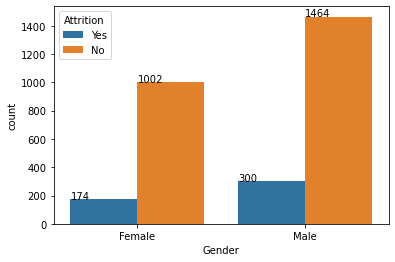

In [22]:
#Show the number of employees that left and stayed by Gender
ax = sns.countplot(x="Gender", hue="Attrition", data=employee_prediction)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

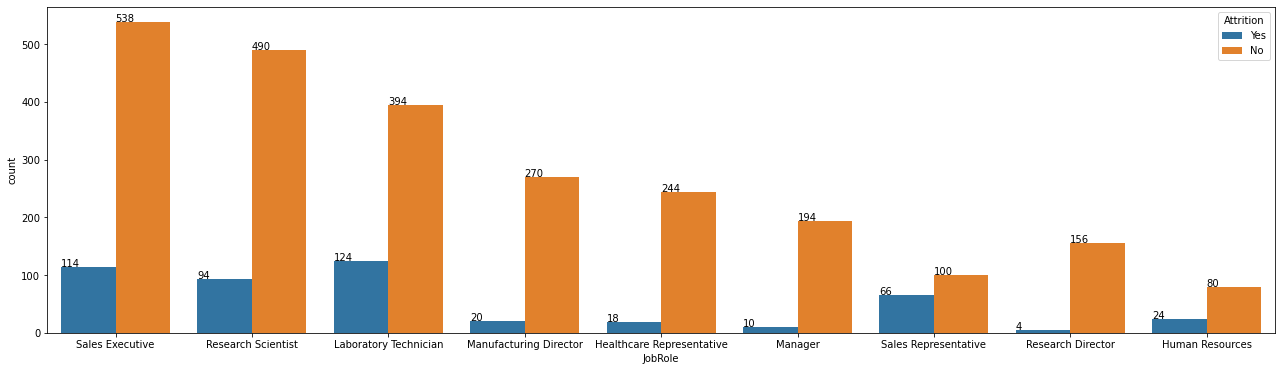

In [23]:
#Show the number of employees that left and stayed by JobRole
fig_dims = (22, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="JobRole", hue="Attrition", data=employee_prediction)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

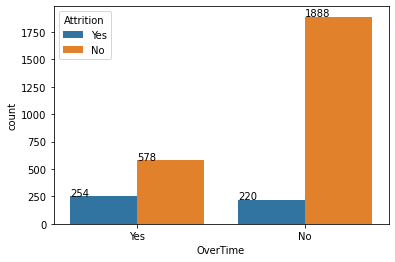

In [24]:
#Show the number of employees that left and stayed based on OverTime
ax = sns.countplot(x="OverTime", hue="Attrition", data=employee_prediction)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [25]:
#Remove unneeded columns
#Remove the column EmployeeNumber
employee_prediction = employee_prediction.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
employee_prediction = employee_prediction.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
employee_prediction = employee_prediction.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
employee_prediction = employee_prediction.drop('Over18', axis = 1) #Contains only the value 'Yes'

In [26]:
employee_prediction.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

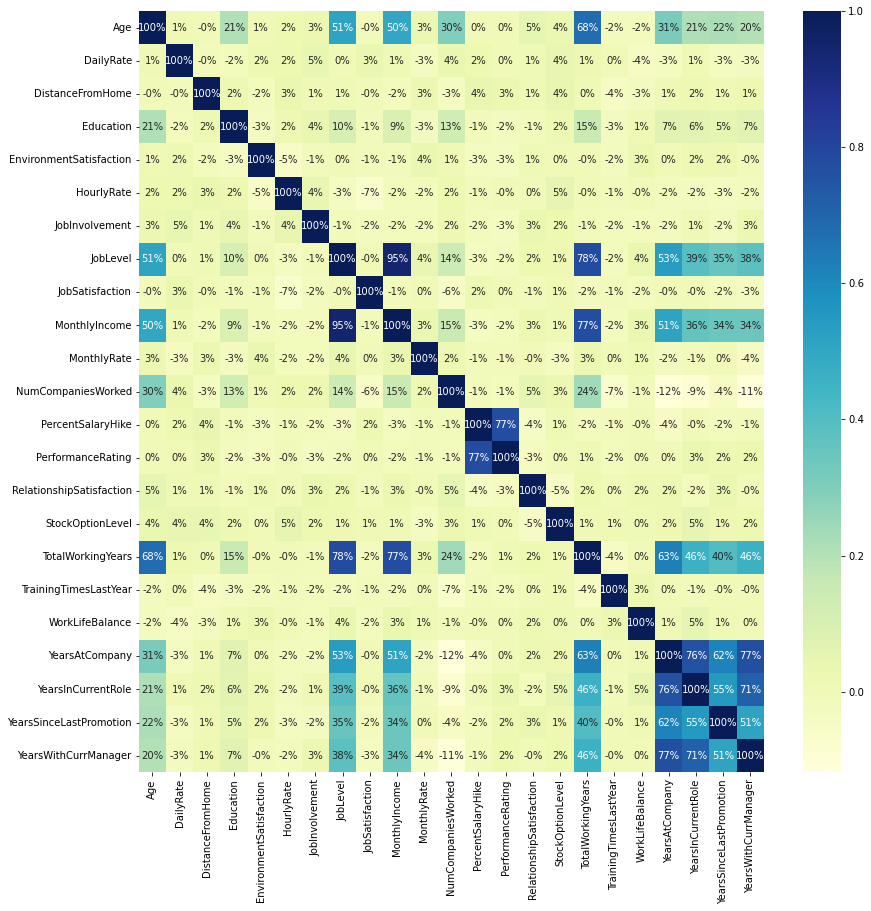

In [27]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(employee_prediction.corr(), annot=True, fmt='.0%',cmap="YlGnBu")

<b><font size="3">Data Preprocessing </b>
    

In [28]:
#Transform non-numeric columns into numerical columns
for column in employee_prediction.columns:
        if employee_prediction[column].dtype == np.number:
            continue
        employee_prediction[column] = LabelEncoder().fit_transform(employee_prediction[column])

In [29]:
#Create a new column at the end of the dataframe that contains the same value 
employee_prediction['Age_Years'] = employee_prediction['Age']
#Remove the first column called age 
employee_prediction = employee_prediction.drop('Age', axis = 1)
#Show the dataframe
employee_prediction

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
2936,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
2937,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
2938,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [30]:
#Split the data into independent 'X' and dependent 'Y' variables
X = employee_prediction.iloc[:, 1:employee_prediction.shape[1]].values 
Y = employee_prediction.iloc[:, 0].values 

<b><font size="3">Developing Model and Predicting Attirition</b>

In [31]:
# Split the dataset into 75% Training set and 25% Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [32]:
#Use Random Forest Classification algorithm
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [33]:
#Get the accuracy on the training data
print("Random Forest score = ",forest.score(X_train, Y_train))

Random Forest score =  0.9950113378684807


In [34]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[604   6]
 [ 33  92]]
Model Testing Accuracy = "0.9469387755102041!"



In [35]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':employee_prediction.iloc[:, 1:employee_prediction.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.073
Age_Years,0.062
DailyRate,0.060
MonthlyRate,0.055
TotalWorkingYears,0.049
OverTime,0.045
PercentSalaryHike,0.045
DistanceFromHome,0.045
YearsAtCompany,0.042


<AxesSubplot:xlabel='feature'>

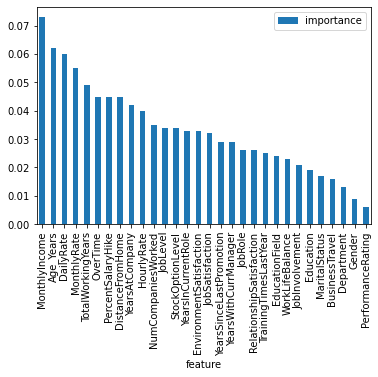

In [36]:
#Visualize the importance
importances.plot.bar()

- PROJECT BY JAINAM KOTHARI 